# Sklearn

# Визуализация данных

Подключаем набор данных

In [1]:
#from sklearn import datasets
import pandas as pd
import numpy as np
%pylab inline

from configs_MNIST_Fashion import DATA_DIR, LOG_DIR, ROOT_DIR
from libs.MNIST_Fashion import mnist_reader
from libs.MNIST_Fashion.helper import get_sprite_image

Populating the interactive namespace from numpy and matplotlib


Проверка переменных для закачки датасета

In [2]:
for s in [ROOT_DIR, DATA_DIR, LOG_DIR]:
    print(s)

/Users/alexanderkulikov/CourceML/P-MNIST-Fashion/
/Users/alexanderkulikov/CourceML/P-MNIST-Fashion/Data/MNIST_Fashion/
/Users/alexanderkulikov/CourceML/P-MNIST-Fashion/Logs/MNIST_Fashion/


### Загрузка выборки

In [3]:
def get_data():
    X, Y = mnist_reader.load_mnist(path=DATA_DIR, kind='t10k')

    labels = ['t_shirt_top', 'trouser', 'pullover', 'dress', 'coat', 'sandal', 'shirt', 'sneaker', 'bag', 'ankle_boots']
    Y_str = np.array([labels[j] for j in Y])

    columns = ['X', 'Y', 'Y_str']
    df = pd.DataFrame(columns=columns)
    df_tmp = pd.DataFrame(columns=columns)

    df_tmp['X'] = X[:].tolist()
    df_tmp['Y'] = Y[:]
    df_tmp['Y_str'] = Y_str[:]

    df_tmp.sort_values(['Y'], ascending=[True], inplace=True, axis=0)
    labels_ids = df_tmp['Y'].unique()
    line_index = 0

    for cur_id in sorted(labels_ids):
        for cur_line in df_tmp[df_tmp['Y'] == cur_id][:200].values:
            df.loc[line_index] = [cur_line[i] for i in range(3)]
            line_index += 1

    X = np.array([line for line in df['X'].values])
    Y = np.array([line for line in df['Y'].values])
    Y_str = np.array([line for line in df['Y_str'].values])

    plt.imsave(DATA_DIR + '/mnist-fashion-sprite.png', get_sprite_image(X), cmap='gray')
    return X, Y, Y_str, df

X, Y, Y_str, df = get_data()

Проверим структуру выборки 

In [4]:
df.Y_str.value_counts()

sandal         200
bag            200
sneaker        200
ankle_boots    200
t_shirt_top    200
coat           200
shirt          200
pullover       200
dress          200
trouser        200
Name: Y_str, dtype: int64

Примеры значений для первого элемента 

In [5]:
print('target:', Y[0], Y_str[0])
print('features: \n', X[0] )
print('number of features:', len(X[0]))

target: 0 t_shirt_top
features: 
 [  0   0   0   0   0   0   0   0  65 161  57   2   0   0   0   0   0   0
  46 166 121   0   0   0   1   0   0   0   0   0   0   1   0   0 141 177
 172 198 184 203 208 208 235 221 168 212 207 203 176 196 154  15   0   1
   0   0   0   0   0   8   0  49 189 148 165 173 179 191 168 176 207 193
 191 168 173 187 165 152 190 117   0   2   0   0   0   0   0   1   0  91
 177 161 184 172 156 197 135 201 203 177 175 214 166 144 189 168 172 135
   0   0   0   0   0   0   0   0   0 147 177 165 169 156 161 152 168 179
 176 158 140 137 179 151 159 163 170 161   0   0   0   0   0   0   0   0
   0 175 173 169 179 168 170 159 163 182 176 182 187 172 163 173 159 170
 165 177  19   0   0   0   0   0   0   0   0 162 175 177 176 170 162 141
 165 184 158 156 151 162 162 155 170 169 172 184  60   0   0   0   0   0
   0   0  30 176 173 203 210 173 166 166 166 149 156 162 166 161 159 163
 169 198 161 182 102   0   0   0   0   0   0   0  58 180 170 151 119 200
 165 161 161 166 

## Визуализация объектов выборки

у нас одномерный массив с изображением(784 эдемента), для визуализации его необходимо преобразовать к замеру(28х28)

иначе созникнет ошибка "Invalid dimensions for image data"

Добавим колонку X_reshaped в наш массив и будем ее использовать для визуализации

In [6]:
#pylab.imshow(X[0])
shape_img = (28, 28)
X_reshaped = np.array([i.reshape(shape_img) for i in X[::1]])

теперь можно показать изображение 

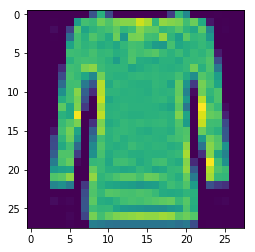

In [7]:
pylab.imshow(X_reshaped[0])

существует множество вариантов отображения цветов

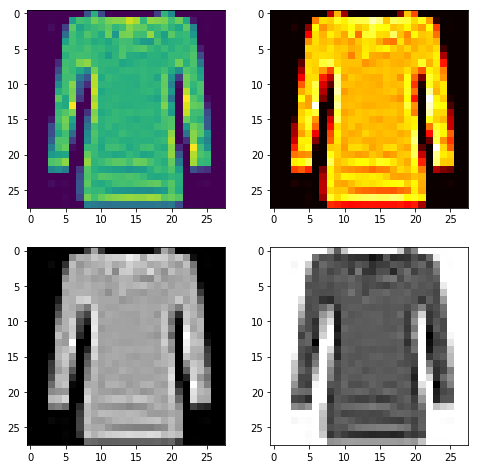

In [8]:
pyplot.figure(figsize(8, 8))

pyplot.subplot(2, 2, 1)
pylab.imshow(X_reshaped[0])

pyplot.subplot(2, 2, 2)
pylab.imshow(X_reshaped[0], cmap = 'hot')

pyplot.subplot(2, 2, 3)
pylab.imshow(X_reshaped[0], cmap = 'gray')

pyplot.subplot(2, 2, 4)
pylab.imshow(X_reshaped[0], cmap = 'gray_r')

Отобразим первые 10 элементов выборки 

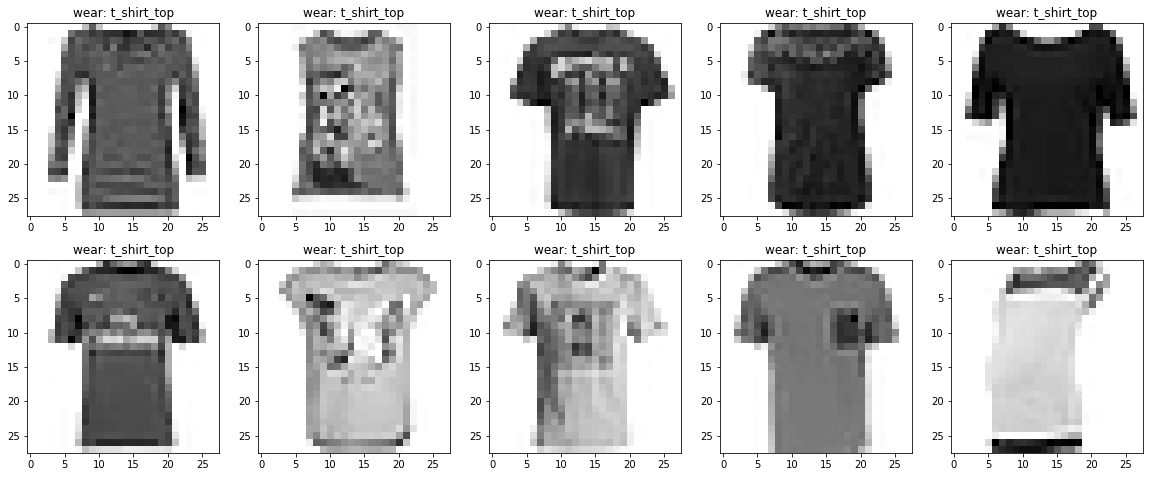

In [9]:
pyplot.figure(figsize(20, 8))

for plot_number, plot in enumerate(X_reshaped[:10]):
    pyplot.subplot(2, 5, plot_number + 1)
    pylab.imshow(plot, cmap = 'gray_r')
    pylab.title('wear: ' + str(Y_str[plot_number]))

## Уменьшение размерности

Проверим как уменьшение размерности влияет на качество классификации. 

Для начала выполним классификацию в исходном пространстве признаков 

In [10]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score
#from collections import Counter

Применим классификация К-средних, проверим значения по умолчанию для классификатора 

In [11]:
classifier = KNeighborsClassifier()
classifier.fit(X, Y_str)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [12]:
print(classification_report(classifier.predict(X), Y_str))
print('Accuracy',accuracy_score(classifier.predict(X), Y_str)) 

             precision    recall  f1-score   support

ankle_boots       0.94      0.90      0.92       211
        bag       0.92      0.94      0.93       195
       coat       0.81      0.71      0.76       227
      dress       0.89      0.90      0.89       196
   pullover       0.81      0.74      0.78       219
     sandal       0.75      0.99      0.85       151
      shirt       0.54      0.68      0.60       159
    sneaker       0.97      0.81      0.88       239
t_shirt_top       0.83      0.79      0.81       212
    trouser       0.94      0.99      0.97       191

avg / total       0.85      0.84      0.84      2000

Accuracy 0.841


### PCA

понизим размерность(с 784-х до 2-х) исходного пространства методом главных компонент.

In [13]:
from sklearn.decomposition import PCA

In [14]:
pca = PCA(n_components=2, random_state=0)
data_2d_pca = pca.fit_transform(X)

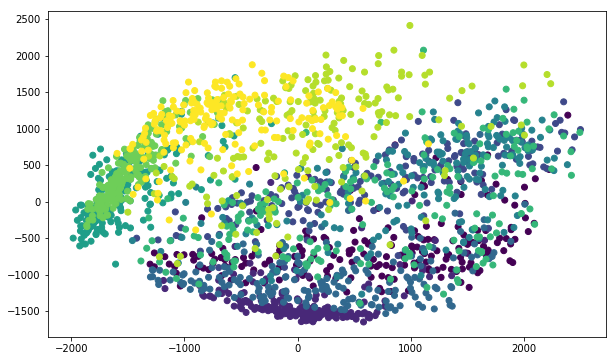

In [15]:
pylab.figure(figsize = (10, 6))
pylab.scatter(data_2d_pca[:, 0], data_2d_pca[:, 1], c = Y)

In [16]:
classifier.fit(data_2d_pca, Y_str)
print(classification_report(classifier.predict(data_2d_pca), Y_str))
print('Accuracy',accuracy_score(classifier.predict(data_2d_pca), Y_str)) 

             precision    recall  f1-score   support

ankle_boots       0.70      0.62      0.66       227
        bag       0.67      0.69      0.68       195
       coat       0.67      0.52      0.59       254
      dress       0.73      0.63      0.68       234
   pullover       0.59      0.57      0.58       208
     sandal       0.69      0.73      0.71       190
      shirt       0.39      0.55      0.45       141
    sneaker       0.68      0.72      0.70       188
t_shirt_top       0.58      0.64      0.61       182
    trouser       0.81      0.90      0.85       181

avg / total       0.66      0.65      0.65      2000

Accuracy 0.6505


Качество значительно ухудшилось! Но попробуйте прибавить кол-во компонент 

### MDS

Применим метод MDS

In [17]:
from sklearn import manifold

In [18]:
mds = manifold.MDS(n_components = 10, n_init = 1, max_iter = 100)
data_2d_mds = mds.fit_transform(X)

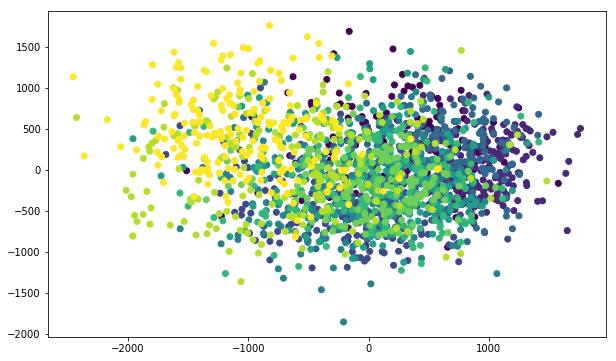

In [19]:
pylab.figure(figsize=(10, 6))
pylab.scatter(data_2d_mds[:, 0], data_2d_mds[:, 1], c = Y)

In [20]:
classifier.fit(data_2d_mds, Y_str)
print(classification_report(classifier.predict(data_2d_mds), Y_str))
print('Accuracy',accuracy_score(classifier.predict(data_2d_mds), Y_str)) 

             precision    recall  f1-score   support

ankle_boots       0.89      0.80      0.84       221
        bag       0.82      0.87      0.84       189
       coat       0.72      0.53      0.61       274
      dress       0.70      0.64      0.67       222
   pullover       0.57      0.58      0.58       199
     sandal       0.68      0.89      0.77       152
      shirt       0.39      0.57      0.46       136
    sneaker       0.88      0.75      0.81       234
t_shirt_top       0.69      0.76      0.72       182
    trouser       0.86      0.90      0.88       191

avg / total       0.74      0.72      0.72      2000

Accuracy 0.7205


### t- SNE

применим метод t-SNE (занимает некоторе время )

In [21]:
tsne = manifold.TSNE(n_components = 2,random_state = 42) #, init = 'pca', random_state = 0
data_2d_tsne = tsne.fit_transform(X)

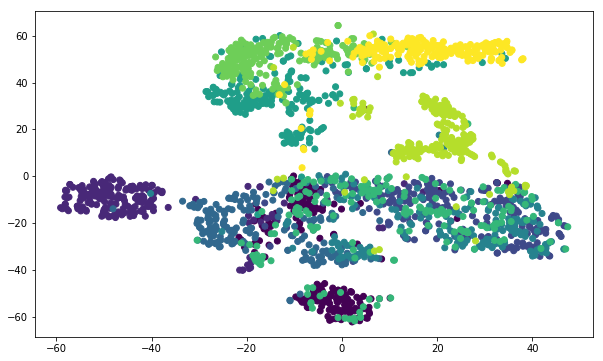

In [22]:
pylab.figure(figsize = (10, 6))
pylab.scatter(data_2d_tsne[:, 0], data_2d_tsne[:, 1], c = Y)


In [23]:
%time classifier.fit(data_2d_tsne, Y_str)
print(classification_report(classifier.predict(data_2d_tsne), Y_str))
print('Accuracy',accuracy_score(classifier.predict(data_2d_tsne), Y_str)) 

CPU times: user 2.61 ms, sys: 896 µs, total: 3.51 ms
Wall time: 2.78 ms
             precision    recall  f1-score   support

ankle_boots       0.94      0.90      0.92       208
        bag       0.94      0.96      0.95       196
       coat       0.77      0.66      0.71       233
      dress       0.88      0.87      0.88       202
   pullover       0.74      0.72      0.73       208
     sandal       0.83      0.92      0.88       181
      shirt       0.53      0.70      0.60       150
    sneaker       0.92      0.86      0.89       213
t_shirt_top       0.84      0.77      0.81       219
    trouser       0.93      0.97      0.95       190

avg / total       0.84      0.83      0.83      2000

Accuracy 0.8315


Получили преобразование которое позволило использовать 2 признака вместо 748, при том же качестве прогноза.  

# Кластеризация 

In [24]:
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import confusion_matrix, homogeneity_completeness_v_measure, silhouette_score, silhouette_samples


classes = sorted(list(set(Y)))
classes_str = sorted(list(set(Y_str)))

classes_str

### Дендрограмма
Визуализация данных в виде дендрограммы. Агломеративная кластеризация. попробуйте разные метрики расстояния, а также данные после проеобразования t-SNE 

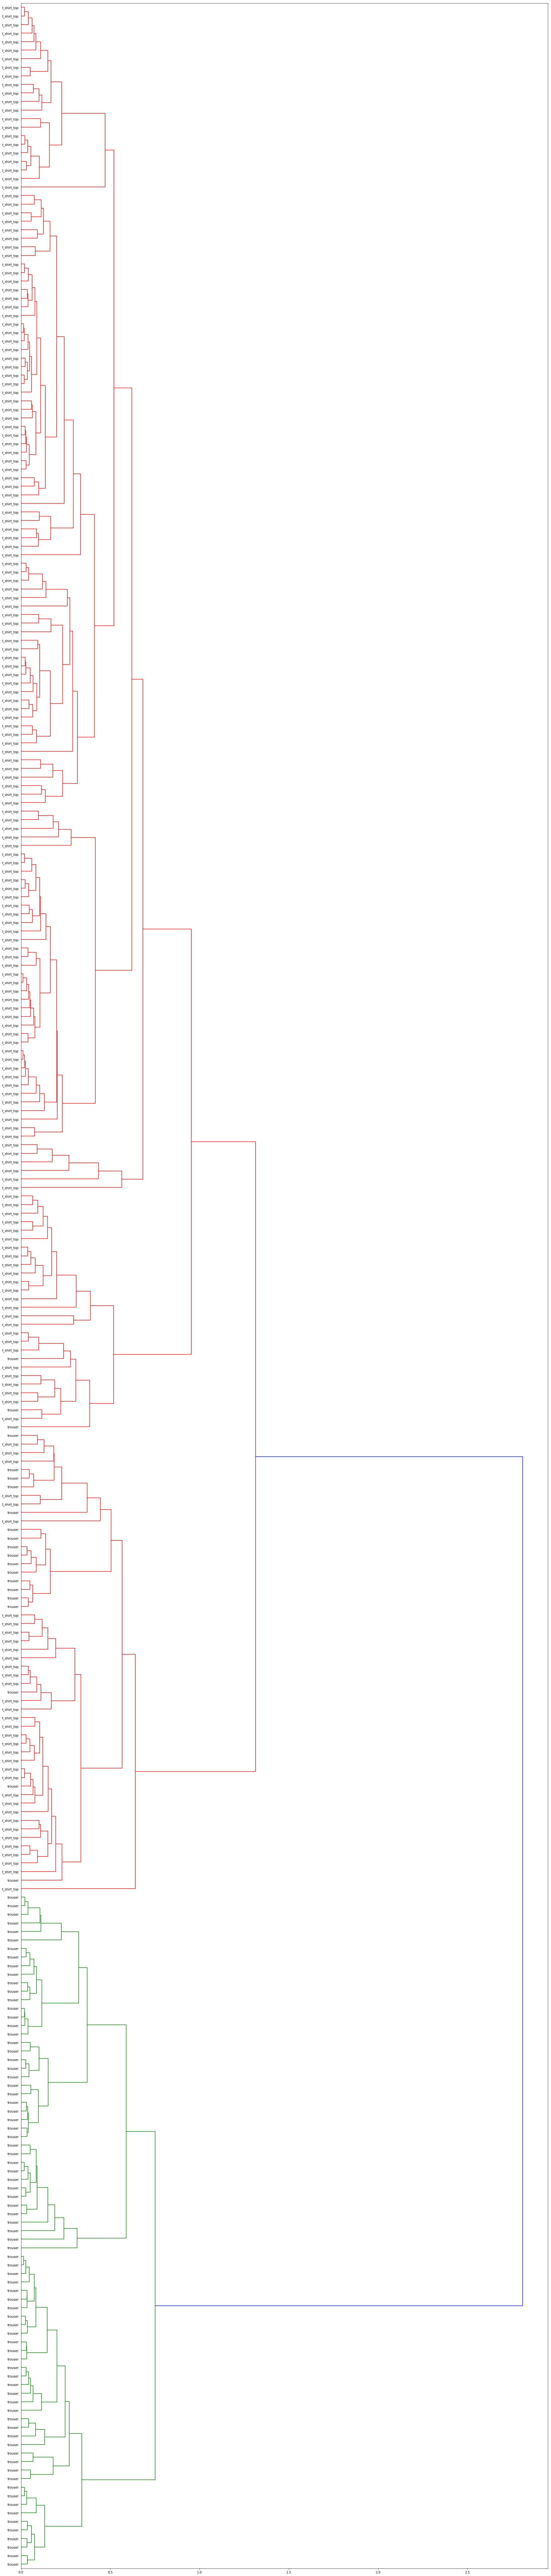

In [25]:
metric = "cosine" # euclidean=/cosine
labels=Y_str[:300]
cluster_x = X[:300] #data_2d_tsne[:300]
dist_matrix = pdist(cluster_x, metric=metric)
Z = linkage(dist_matrix, 'ward') #single/ward
fig = plt.figure(figsize=(30, 150))
dn = dendrogram(Z, labels=labels,leaf_font_size=10,distance_sort="ascending", truncate_mode="none",orientation='right') 

### К-mean, показатели качества  

Сформируем массив классов и подписей.  

In [26]:
classes = list(set(Y))
classes_str = list(set(Y_str))

Вычислим метрики качества и среднее растояние между точками и центрами кластеров, для разного числа кластеров от 1 до 15

для проверки можно использовать начальное пространсотво признаков 

In [27]:
from sklearn.metrics.cluster import homogeneity_completeness_v_measure
inertia = [] 
v_m = []
hg  = []
cn  = []
kx=range(1, 15)
for k in kx:
    kmeans = KMeans(n_clusters=k, random_state=0).fit(data_2d_tsne)
    inertia.append(np.sqrt(kmeans.inertia_))
    h,c,vm= homogeneity_completeness_v_measure(Y  ,kmeans.labels_)
    hg.append(h)
    cn.append(c)
    v_m.append(vm)

среднее расстояние между кластерами уменьшается, обратите внимание на крутизну кривой  

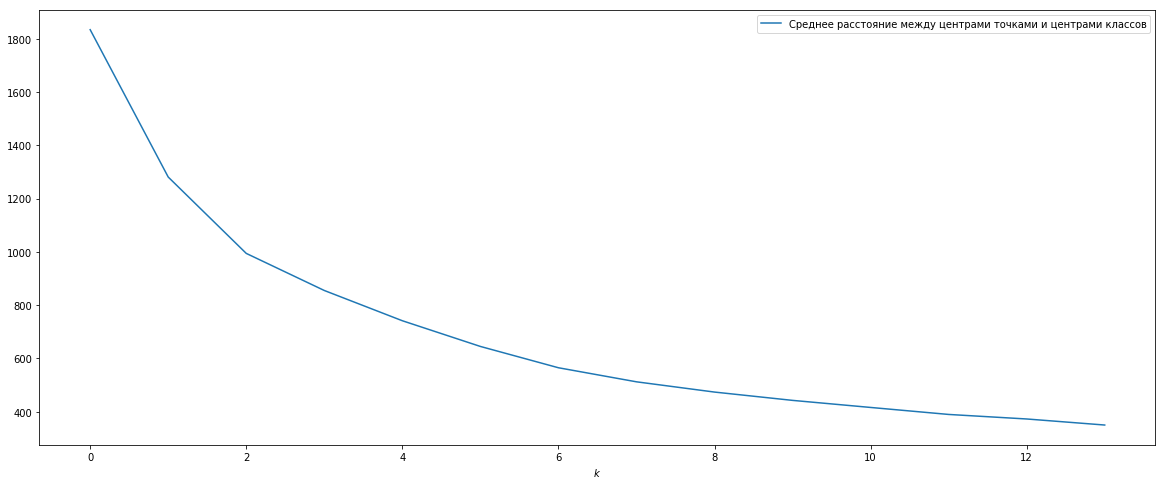

In [28]:
plt.plot(inertia,label='Среднее расстояние между центрами точками и центрами классов')
plt.xlabel('$k$')
plt.legend()

как меняются показатели v_measure homogeneity completeness с ростом числа k. при каком числе кластеров v_measure принимает максимальное значение. 

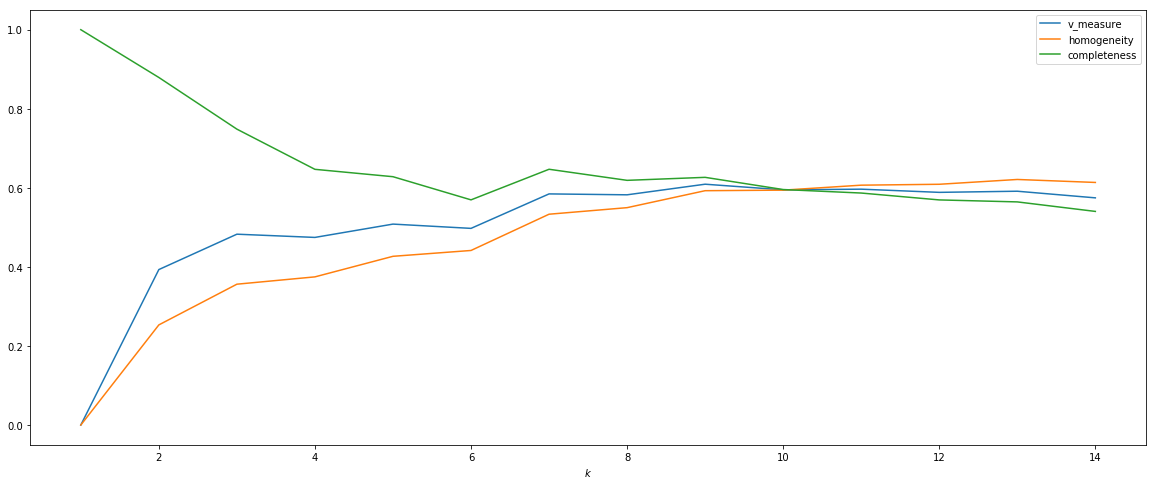

In [29]:
plt.plot(kx, v_m,label='v_measure');
plt.plot(kx, hg,label='homogeneity');
plt.plot(kx, cn,label='completeness');
plt.xlabel('$k$')
plt.legend()

### Состав сформированных кластеров  
вычислим 3 разбиения на кластеры:
- к-средних для k=10
- иерархическая(distance) - где расстояние между элементами кластера не более 2.4. число кластеров определяетс в процессе вычисления
- иерерихческая(maxclust) - где число плоских кластеров устанавливается не менее порога 10. 

и запишем результаты в датафрейм cluster_df

In [30]:
cluster_df = df.copy()
cluster_x = X
dist_matrix = pdist(cluster_x, metric=metric)
kmeans = KMeans(n_clusters=len(classes), random_state=0).fit(cluster_x)
kmeans_y = kmeans.predict(cluster_x)
Z = linkage(dist_matrix, 'ward') #single/ward
hierarch_1 = fcluster(Z, 2.4, criterion="distance")
hierarch_2 = fcluster(Z, 10, criterion="maxclust")
cluster_df["kmeans"] = kmeans_y
cluster_df["distance"] = hierarch_1
cluster_df["maxclust"] = hierarch_2

визуализируем из каких объектов состоят разделившиеся кластеры. можно определить объекты в каких кластерах чаще всего путаются 

In [31]:
from IPython.html import widgets
from IPython.display import display, clear_output, HTML
from ipywidgets import HBox, VBox, Layout, Output
import tabulate
cluster_types = ["kmeans","distance","maxclust"]
column_name = 'Y_str'
def select_cluster_type(cluster_type):
    with out:
        clear_output()

    clusters = sorted(set(cluster_df[cluster_type]))
    clusters_list.options = clusters
    select_cluster(clusters[0])

    
def select_cluster(cluster_name):
    with out:
        clear_output()
        
        value_counts = df[cluster_df[cluster_type.value] == cluster_name][column_name].value_counts()
        summa = sum(value_counts)
        
        table = []
        headers = ["Категория", "Количество", "Доля в текущем кластере", "Доля от всех объектов категории"]
        for elem in value_counts.iteritems():
            count = len(df[df[column_name] == elem[0]])
            table.append([elem[0], elem[1], "{0:.3f}%".format(elem[1] / summa), "{0:.3f}%".format(elem[1] / count)])
        display(HTML(tabulate.tabulate(table, headers=headers, tablefmt='html')))
        

cluster_type = widgets.Select(options=cluster_types, description="Тип", rows=10)
clusters_list = widgets.Select(options=[], description="Кластер", rows=10)

i = widgets.interactive(select_cluster_type, cluster_type=cluster_type)
j = widgets.interactive(select_cluster, cluster_name=clusters_list)

out = Output()

VBox([HBox([i, j]), out])

/Users/alexanderkulikov/anaconda3/lib/python3.6/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


# Силуэт


Данный коэффициент не предполагает знания истинных меток объектов, и позволяет оценить качество кластеризации, используя только саму (неразмеченную) выборку и результат кластеризации. Сначала силуэт определяется отдельно для каждого объекта. Силуэтом выборки называется средняя величина силуэта объектов данной выборки.

Силуэт показывает, насколько среднее расстояние до объектов своего кластера отличается от среднего расстояния до объектов других кластеров. Коэффициент лежит в диапазоне (-1;1).Значения: 
- близкие к -1, соответствуют плохим (разрозненным) кластеризациям, 
- близкие к нулю, говорят о том, что кластеры пересекаются и накладываются друг на друга,
- близкие к 1, соответствуют "плотным" четко выделенным кластерам.
Таким образом, чем больше силуэт, тем более четко выделены кластеры, и они представляют собой компактные, плотно сгруппированные облака точек.С помощью силуэта можно выбирать оптимальное число кластеров  (если оно заранее неизвестно) — выбирается число кластеров, максимизирующее значение силуэта. 

Для кол-ва кластеров = 2 средний коэффициент силуэта: 0.19151360587015062
Для кол-ва кластеров = 4 средний коэффициент силуэта: 0.17867778389365116
Для кол-ва кластеров = 6 средний коэффициент силуэта: 0.15712372741395203
Для кол-ва кластеров = 8 средний коэффициент силуэта: 0.16435729378738909
Для кол-ва кластеров = 10 средний коэффициент силуэта: 0.1519687580204037
Для кол-ва кластеров = 15 средний коэффициент силуэта: 0.1394598143833765


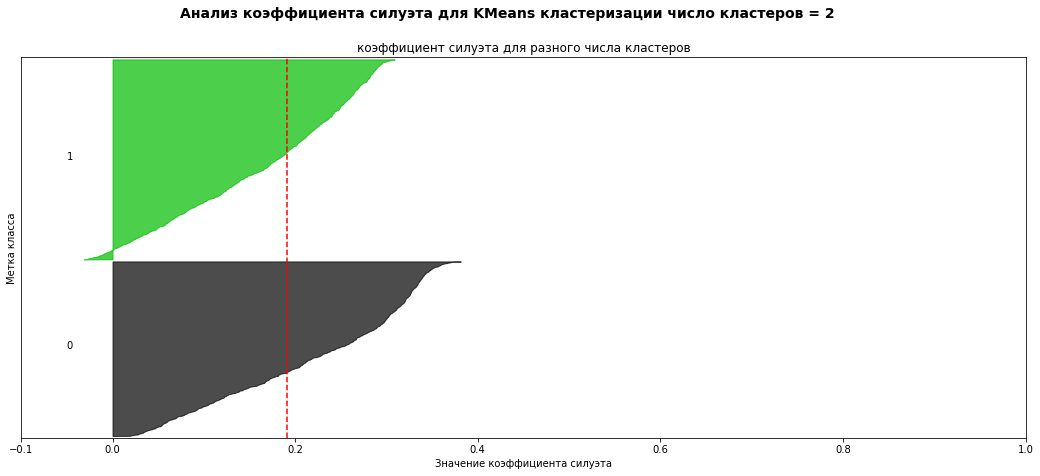

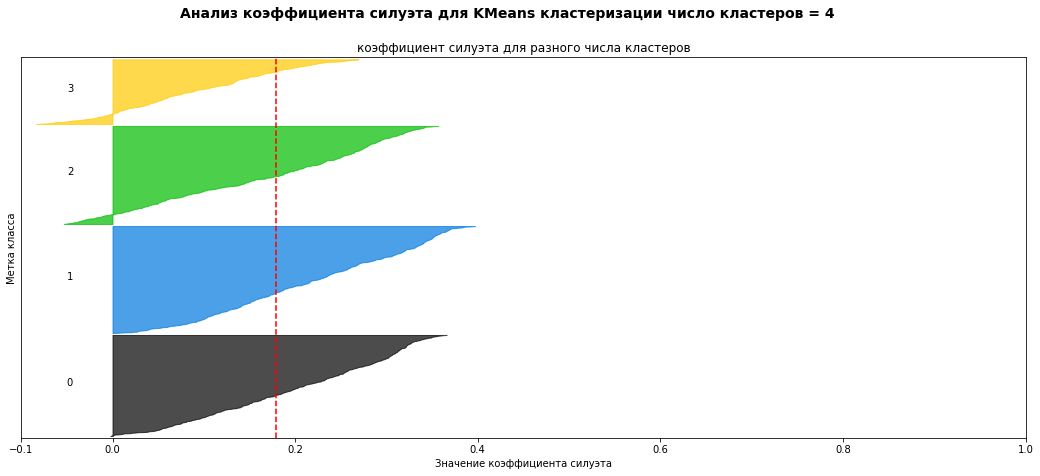

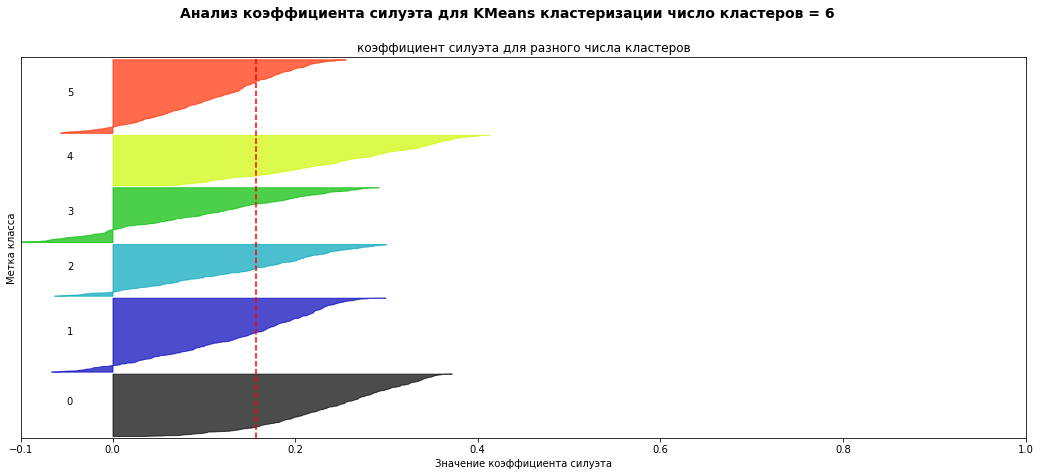

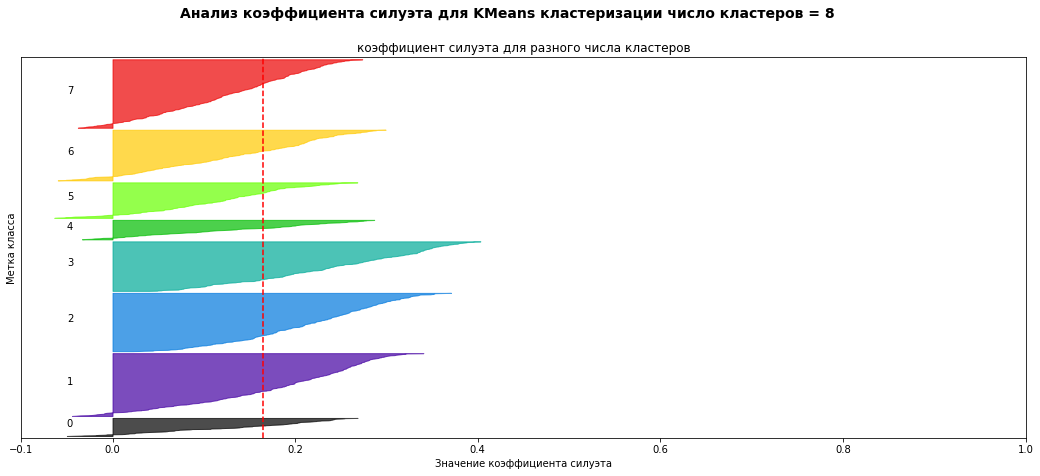

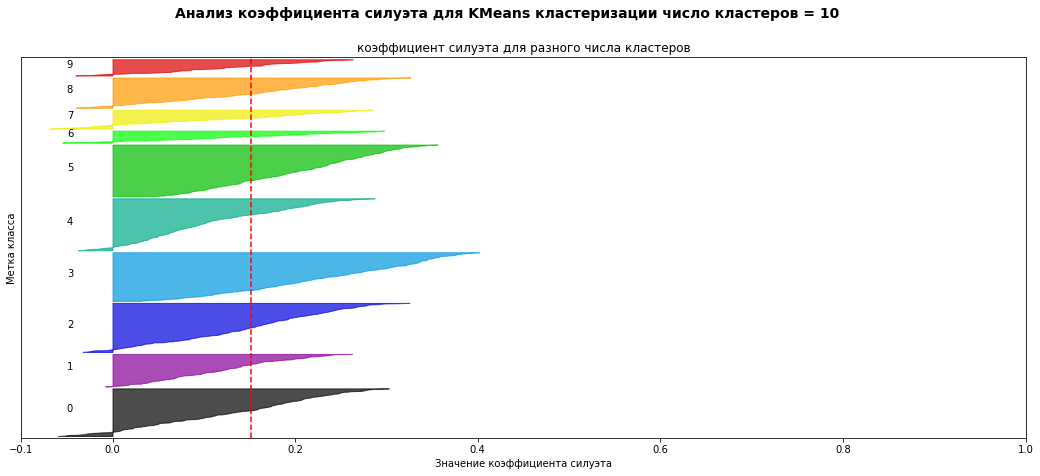

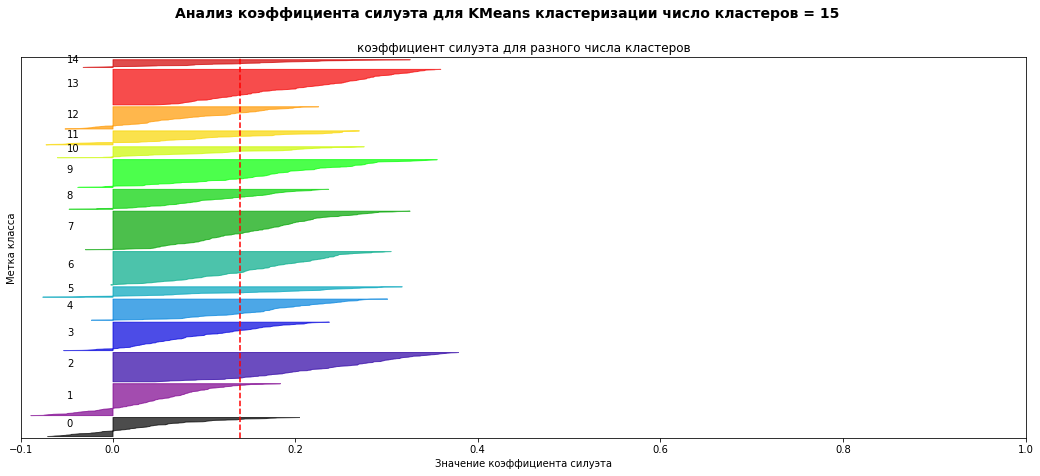

In [36]:
range_n_clusters = [2,4,6,8,10,15]

for n_clusters in range_n_clusters:
    fig, ax = plt.subplots()
    fig.set_size_inches(18, 7)

    ax.set_xlim([-0.1, 1])
    ax.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    clusterer = KMeans(n_clusters=n_clusters, random_state=0)
    cluster_labels = clusterer.fit_predict(X)

    silhouette_avg = silhouette_score(X, cluster_labels)
    print("Для кол-ва кластеров =", n_clusters,
          "средний коэффициент силуэта:", silhouette_avg)

    # вычисляем коээфициент силуэта для каждого элемента
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # сортируем все элементы попавшие в один кластер 
        ith_cluster_silhouette_values =  sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax.set_title("коэффициент силуэта для разного числа кластеров")
    ax.set_xlabel("Значение коэффициента силуэта")
    ax.set_ylabel("Метка класса")

    # Вертикальная линяя показывает среднее значение для всей выборки
    ax.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax.set_yticks([])  
    ax.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    plt.suptitle(("Анализ коэффициента силуэта для KMeans кластеризации "
                  "число кластеров = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()